# Proyecto 1 Etapa 1

Integrantes:
* Catalina Velez
* Andrés Perez
* Luciana Bacci

# 1. Preprocesamiento y análisis de datos
Instalación de spaCy y Modelos de lenguaje

## Carga

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importacion de librerias

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import joblib

### Carga del modelo de lenguaje

In [ ]:
import spacy
nlp = spacy.load("es_core_news_md") #Modelo de lenguaje español

## Lectura de los datos

In [ ]:
import pandas as pd

data = pd.read_excel("/content/Datos_proyecto.xlsx")

## Entendimiento de los datos

In [ ]:
print(data.sample(5))
print("Total de registros: ", data.shape[0])

                                                 textos  labels
569   Se han encontrado resultados similares en estu...       3
2148  Estos pueden basarse en la edad, el sexo o el ...       3
1270  Esta es una imagen consistente que surge para ...       3
2295  Ministerio de Educación de Bangladesh, 2012). ...       4
316   Es más probable que los padres que abusan de l...       3
Total de registros:  2424


Se puede ver que hay 2424 opiniones de los ciudadanos y que hay 2 variables dentro del proyecto. La primera se refiere a la variable textos, que es una cadena de caracteres y es la opinión de los ciudadanos. Mientras que la segunda variable labels, se refiere al ODS al que corresponde la opinión, en donde hay 3 posibles valores: 1 -> Fin de la pobreza, 3-> Salud y bienestar y 4 -> Educación y calidad

Unicidad

In [ ]:
print("Duplicados: ", data.duplicated().sum())

Duplicados:  0


Completitud

In [ ]:
print(data.isnull().sum())

textos    0
labels    0
dtype: int64


Validez

In [ ]:
data.describe()

In [ ]:
data.dtypes

## Preprocesamiento del texto

In [ ]:
dataCopy = data.copy()
dataCopy['procesado'] = dataCopy['textos'].apply(lambda x: nlp(x))
dataCopy[['textos', 'procesado']].head()

Tokenización

In [ ]:
dataCopy['tokens'] = dataCopy['procesado'].apply(lambda doc: [token.text for token in doc])
dataCopy[['textos', 'tokens']].head()

Lematización (Obtener la base de las palabras)

In [ ]:
dataCopy['lemmas'] = dataCopy['procesado'].apply(lambda doc: [token.lemma_ for token in doc])
dataCopy[['textos', 'lemmas']].head()

Eliminación de StopWords

In [ ]:
dataCopy['lemmas_sin_stopwords'] = dataCopy['procesado'].apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop])
dataCopy[['textos', 'lemmas_sin_stopwords']].head()

Filtrado de caracteres especiales

In [ ]:
dataCopy['lemmas_limpios'] = dataCopy['lemmas_sin_stopwords'].apply(lambda lemmas: [lemma for lemma in lemmas if lemma.isalpha()])
dataCopy[['textos', 'lemmas_limpios']].head()

Entidades resultantes

In [ ]:
dataCopy['entidades'] = dataCopy['procesado'].apply(lambda doc: [(ent.text, ent.label_) for ent in doc.ents])
dataCopy[['textos', 'entidades']].head()

Clasificación de palabras

In [ ]:
dataCopy['pos_tags'] = dataCopy['procesado'].apply(lambda doc: [(token.text, token.pos_) for token in doc])
dataCopy[['textos', 'pos_tags']].head()

Texto Preprocesado Final

In [ ]:
dataCopy['texto_preprocesado'] = dataCopy['lemmas_limpios'].apply(lambda lemmas: ' '.join(lemmas))
dataCopy[['textos', 'texto_preprocesado']].head()

Guardar datos

In [ ]:
dataCopy.to_excel("datos_preprocesados.xlsx", index=False)
print("Los datos preprocesados fueron cargados exitosamente")

### 2. Visualización palabras más frecuentes por ODS

In [ ]:
!pip install tlib seaborn wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

def palabras_frecuentes_por_ods(df, columna_lemmas, ods_numero, top_n=10):
    df_ods = df[df['labels'] == ods_numero]
    todos_los_lemmas = df_ods[columna_lemmas].explode()
    contador = Counter(todos_los_lemmas)
    palabras_mas_frecuentes = contador.most_common(top_n)
    return pd.DataFrame(palabras_mas_frecuentes, columns=['Palabra', 'Frecuencia'])

def mostrar_nube_palabras(df_frecuencia):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(df_frecuencia.values))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def mostrar_grafico_barras(df_frecuencia, ods_numero):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencia, palette='viridis')
    plt.title(f'Palabras más frecuentes para ODS {ods_numero}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()



In [ ]:
df_frecuencia_ods1 = palabras_frecuentes_por_ods(dataCopy, 'lemmas_limpios', 1)
mostrar_nube_palabras(df_frecuencia_ods1)
mostrar_grafico_barras(df_frecuencia_ods1, 1)

In [ ]:
df_frecuencia_ods3 = palabras_frecuentes_por_ods(dataCopy, 'lemmas_limpios', 3)
mostrar_nube_palabras(df_frecuencia_ods3)
mostrar_grafico_barras(df_frecuencia_ods3, 3)


In [ ]:
df_frecuencia_ods4 = palabras_frecuentes_por_ods(dataCopy, 'lemmas_limpios', 4)
mostrar_nube_palabras(df_frecuencia_ods4)
mostrar_grafico_barras(df_frecuencia_ods4, 4)


### 3. Transformación de los datos

1. Term Frequency Inverse Document

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(dataCopy['texto_preprocesado']).toarray()

Guardamos el texto para usarlo en el Pipeline

In [ ]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

2. Count Vectorizer

In [ ]:
count = CountVectorizer(max_features=1000)
X_count = count.fit_transform(dataCopy['texto_preprocesado'])
print(X_count.shape)
X_count.toarray()[0]

3. Count Vectorizer Binario

In [ ]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(dataCopy['texto_preprocesado'])
print(X_dummy.shape)
X_dummy.toarray()[0]

### 4. Train y Validation

Tenemos que hacer la división del conjunto para poder hacer el train y validation para poder asegurarnos que el algoritmo pueda predecir correctamente las categorias

In [ ]:
dataCopy.head()

In [ ]:
y = dataCopy["labels"]
X_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=10)
X_train_count, x_validation2_count, y_train2_count, y_validation2_count = train_test_split(X_count, y, test_size=0.3, random_state=10)
X_train_dummy, x_validation_dummy, y_train_dummy, y_validation_dummy = train_test_split(X_dummy, y, test_size=0.3, random_state=10)


### Busqueda de hiperparámetros

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)

Usamos los siguientes parametros para poder realizar la busqeuda de hiperparámetros para este conjunto de datos

In [ ]:
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': [2, 4, 6, 8, 10, 12, 18],
              'min_samples_split': [2, 3, 5, 10, 12]}

Con esto nos aseguramos de escoger la mejor opción posible, por eso usamos KFold() con 10 subconjuntos de datos

In [44]:
kfold = KFold(n_splits=10, shuffle= True, random_state=0)

Se utilizó la búsqueda automática de parámetros (GridSearchCV), usando diferentes configuraciones posibles del modelo de árbol de decisión y después se selecciona la configuración que tenga el mejor rendimiento.

In [45]:
grid = GridSearchCV(decision_tree, param_grid, cv=kfold, n_jobs=-1)

Después se realiza la busqueda de hiperparámetros

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 18],
                         'min_samples_split': [2, 3, 5, 10, 12]})

De aca, se sacan los mejores valores para los hiperparámetros

In [48]:
print("Mejores parámetros: {}".format(grid.best_params_))

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 12}


Se puede ver de los resultados que la mejor configuración genera un arbol de 18 niveles, en donde cada nivel tiene al menos 12 muestras.

Usamos el mejor modelo para el árbol de decisión

In [49]:
best_tree = grid.best_estimator_

### 5. Algoritmo 1: Naïve Bayes

In [50]:
nb = MultinomialNB()

Se usa el parametro de suavización de Laplace (alpha) para controlar la regulación y evitar probabilidades nulas en el conteo de palabras

In [52]:
param_gridNB = { 'alpha': [0.1, 0.5, 1.0, 2.0]}

Usamos GridSearchCV para hacer la búsqueda sistemática de hiperparámetros para el modelo Multinomial Naïve Bayes, usando diferentes combinaciones de valores definidos y usando validación cruzada, se selecciona la configuración que tiene mejor rendimiento promedio, llegando a un modelo de Naïve Bayes optimo.

In [53]:
grid_searchNB = GridSearchCV(estimator=nb, param_grid=param_gridNB, scoring='accuracy')
grid_searchNB.fit(X_train, y_train)
print("Mejores parámetros: {}".format(grid_searchNB.best_params_))
best_NB = grid_searchNB.best_estimator_

Mejores parámetros: {'alpha': 1.0}


El mejor valor para el alpha es 1.0, que significa que se encontró un equilibrio al evitar probabilidades nulas en palabras poco frecuentes sin cambiar mucho al distribución real de las palabras.

### 6. Algoritmo 2: K-Vecinos más cercanos

Para escoger el mejor hiperparámetro, se usa GridSearch

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir los valores posibles de k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 31, 41, 51]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(f"Mejor valor de k: {grid_search.best_params_}")

Mejor valor de k: {'n_neighbors': 41}


In [55]:
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)
y_pred1 = knn.predict(x_validation)

# 7. Evaluación de los modelos

### 7.1 Evaluación de mejor modelo - Algoritmo Árboles de decisión

Se hace la predicción sobre el conjunto de validación que se creó antes de crear el árbol de decisión

In [56]:
y_pred = best_tree.predict(x_validation)

Ahora creamos la matriz de confusión que deja ver que tan acertado esta la predicción del Árbol de decisión.

In [57]:
matriz_confusion = confusion_matrix(y_validation, y_pred, labels=best_tree.classes_)

Se crea el grafico para mostrar la matriz

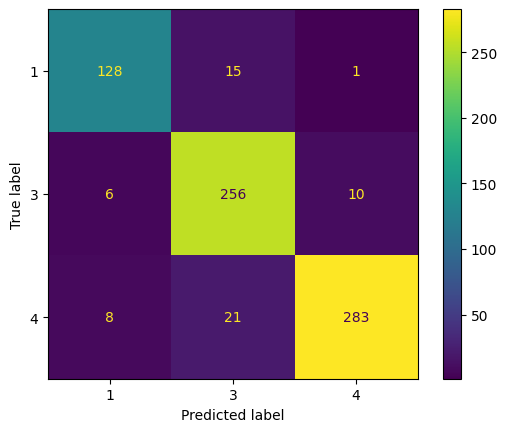

In [65]:
matrix_display = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=best_tree.classes_)
matrix_display.plot()

En base a la matriz de confusión, se puede ver que el árbol de decisión tiene un buen nivel de aciertos en las 3 clases, sobre todo en el ODS 3 y ODS 4, donde hay los 280 aciertos. Pero también hay un nivel de confusión entre el ODS 1 y ODS 3, mostrando que algunas opiniones sobre la pobreza que pueden tener términos sobre la salud o viceversa.

Para el ODS 1 se tiene un 88.9% de certeza, mientras que el ODS 3 tiene un porcentaje de certeza de 94.1%, y para el ODS 4 tiene un porcentaje de certeza de 90.7%. Esto demuestra que el modelo esta muy acertado.

Igual se hace el reporte de clasificación de las predicciones del algoritmo en base de los datos de validación

In [66]:
print(classification_report(y_validation, y_pred))
print('Exactitud: %.2f' % accuracy_score(y_validation, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95       144
           3       0.97      0.97      0.97       272
           4       0.97      0.98      0.98       312

    accuracy                           0.97       728
   macro avg       0.97      0.96      0.97       728
weighted avg       0.97      0.97      0.97       728

Exactitud: 0.97


Basado en el reporte de clasificación se puede ver los puntajes F1 que muestran que hay un balance entre precisión y recall, y muestra que el modelo logra tener un desempeño sólido en la clasificación de los ODS.

### 7.2 Evaluación del modelo - Algoritmo Naïves Bayes

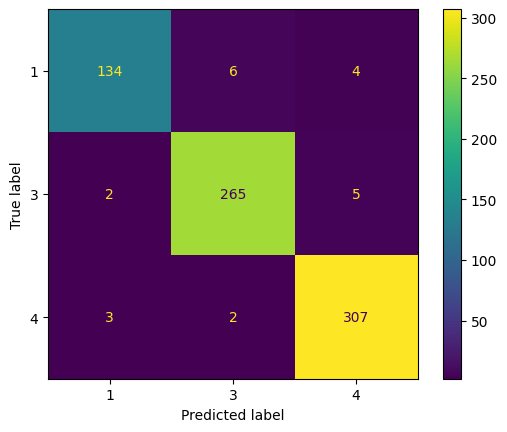

In [67]:
y_pred = best_NB.predict(x_validation)
matriz_confusionNB = confusion_matrix(y_validation, y_pred, labels=best_NB.classes_)
matrix_display_NB = ConfusionMatrixDisplay(confusion_matrix=matriz_confusionNB, display_labels=best_NB.classes_)
matrix_display_NB.plot()

En base a la matriz de confusión, se observa que el modelo de Naïve Bayes obtiene un alto nivel de aciertos en las tres clases. Para el ODS 1 se clasificaron correctamente 134 textos, con solo 10 errores distribuidos en las demás categorías. En el ODS 3 se alcanzaron 265 aciertos, con únicamente 7 clasificaciones incorrectas. Finalmente, el ODS 4 presentó el mejor desempeño, con 307 aciertos y apenas 5 errores. Esto refleja que el modelo distingue de manera muy efectiva entre las tres clases.

In [70]:

report = classification_report(y_validation, y_pred)
grid_searchNB.best_params_, report
print(report)
print(f"Exactitud: {accuracy_score(y_validation, y_pred):.2f}")
print(f"Recall: {recall_score(y_validation, y_pred, average='weighted'):.2f}")
print(f"Precisión: {precision_score(y_validation, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_validation, y_pred, average='weighted'):.2f}")

              precision    recall  f1-score   support

           1       0.96      0.93      0.95       144
           3       0.97      0.97      0.97       272
           4       0.97      0.98      0.98       312

    accuracy                           0.97       728
   macro avg       0.97      0.96      0.97       728
weighted avg       0.97      0.97      0.97       728

Exactitud: 0.97
Recall: 0.97
Precisión: 0.97
F1-Score: 0.97


De acuerdo con el reporte de clasificación, el modelo Naïve Bayes logra una exactitud global del 97%, mostrando métricas muy equilibradas entre las distintas clases. Este resultado refleja un balance entre precisión y recall, confirmando que el modelo no solo es robusto, sino que también ofrece un desempeño consistente en la clasificación de los textos en los ODS.

### 7.3 Evaluación del modelo - Algoritmo K-Vecinos (más cercanos)

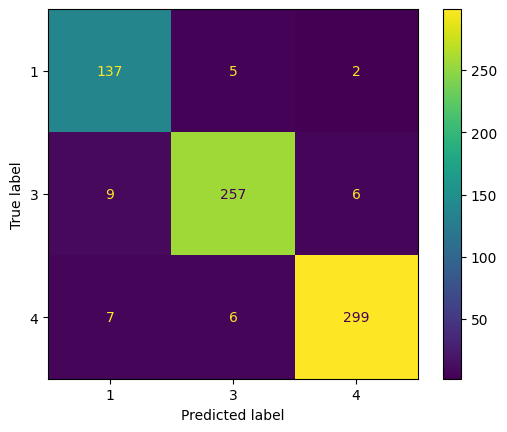

In [71]:
matriz_confusion = confusion_matrix(y_validation, y_pred1, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=knn.classes_)
disp.plot()

En base a la matriz de confusión, se observa que el algoritmo de K-Vecinos logra un buend desempeño para las tres clases. Para el ODS 1 se obtuvieron 137 aciertos y únicamente 7 errores repartidos. En el ODS 3 se clasificaron correctamente 257 textos, con 15 errores. Finalmente, el ODS 4 alcanzó el mejor desempeño, con 299 aciertos y solo 13 errores. Estos resultados muestran que el modelo es capaz de distinguir de forma adecuada entre las tres categorías.

In [80]:
accuracy = accuracy_score(y_validation, y_pred1)
print(classification_report(y_validation, y_pred1))
print(f"Exactitud: {accuracy:.2f}")

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       144
           3       0.96      0.94      0.95       272
           4       0.97      0.96      0.97       312

    accuracy                           0.95       728
   macro avg       0.94      0.95      0.95       728
weighted avg       0.95      0.95      0.95       728

Exactitud: 0.95


El reporte de clasificación refuerza el buen desempeño del modelo KNN, mostrando una exactitud global del 95%. Estas métricas confirman que el algoritmo logra un rendimiento alto y estable en la tarea de clasificación de los ODS.

### 7.4 Selección del mejor modelo

Con base en los resultados obtenidos, el modelo que mostró el mejor desempeño fue Naïve Bayes, alcanzando una exactitud global del 97% y métricas muy equilibradas de precisión, recall y F1-score en las tres clases. Aunque tanto el Árbol de Decisión (92%) como K-Vecinos (95%) lograron buenos resultados, escogimos el modelo de Naïve Bayes ya que fue mejor que los otros dos al tener mejor balance entre precisión y recall y tiene menos confusiones. Ahora guardamos el mejor modelo para usarlo en la pipeline.

In [81]:
joblib.dump(best_NB, 'model.pkl')

['model.pkl']

# 8. Creación del pipeline

Creación del encoder

In [94]:
tfidf = TfidfVectorizer()

Necesitamos crear las clases que vamos a usar el preprocesamiento de textos

In [95]:
import spacy

class ToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, file_path=None):
        self.file_path = file_path

    def fit(self, X=None, y=None):
        return self

    def transform(self, X=None, y=None):
        if isinstance(self.file_path, pd.DataFrame):
            return self.file_path

        if not self.file_path:
            raise ValueError("No file path provided for ToDataFrame transformer.")

        try:
            if self.file_path.endswith(".csv"):
                dataframe = pd.read_csv(self.file_path)
                print("Data read as CSV")
                return dataframe
            elif self.file_path.endswith(".xlsx"):
                dataframe = pd.read_excel(self.file_path)
                print("Data read as Excel")
                return dataframe
            elif self.file_path.endswith(".json"):
                dataframe = pd.read_json(self.file_path)
                print("Data read as JSON")
                return dataframe
            else:
                raise ValueError("Unsupported file format. Please provide a CSV, Excel, or JSON file.")
        except Exception as e:
            raise ValueError(f"Failed to read file: {e}")


class ProcesandoTexto(BaseEstimator, TransformerMixin):

    nlp = spacy.load("es_core_news_md")
    def __init__(self, column):
        self.column = column

    def fit(self, Z, y=None):
        return self

    def transform(self, Z):
        if Z is None or not isinstance(Z, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        if self.column not in Z.columns:
            raise ValueError(f"Column '{self.column}' not found in DataFrame.")

        print("procesando")
        ZCopy = Z.copy()
        ZCopy['procesado'] = Z[self.column].apply(lambda x: self.nlp(x))
        return ZCopy

class Tokenizacion(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, Z, y=None):
        return self

    def transform(self, Z):
        print("tokenizando")
        Z['tokens'] = Z[self.column].apply(lambda doc: [token.text for token in doc])
        return Z

class Lematizacion(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, Z, y=None):
        return self

    def transform(self, Z):
        print("lematizando")
        Z['lemmas'] = Z[self.column].apply(lambda doc: [token.lemma_ for token in doc])
        return Z

class BorrarStopWord(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, Z, y=None):
        return self

    def transform(self, Z):
        print("stopwords")
        Z['lemmas_sin_stopwords'] = Z[self.column].apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop])
        return Z

class FiltrarCaracteresEspeciales(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, Z, y=None):
        return self

    def transform(self, Z):
        print("lemmas limpios")
        Z['lemmas_limpios'] = Z[self.column].apply(lambda lemmas: [lemma for lemma in lemmas if lemma.isalpha()])
        return Z

class TextoFinal(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, Z, y=None):
        return self

    def transform(self, Z):
        print("texto final")
        Z['texto_preprocesado'] = Z[self.column].apply(lambda lemmas: ' '.join(lemmas))
        return Z


class Predicciones(BaseEstimator, TransformerMixin):
    def __init__(self, model, vectorizer):
        self.model = model
        self.vectorizer = vectorizer

    def fit(self, Z, y=None):
        return self

    def predict(self, Z):
        X = self.vectorizer.fit_transform(Z['texto_preprocesado']).toarray()
        predictions = self.model.predict(X)



        Z_copy = Z.copy()

        Z_copy['labels'] = predictions
        print("Predicciones añadidas")
        Z_copy.drop(columns=['texto_preprocesado', 'procesado', 'tokens', 'lemmas', 'lemmas_sin_stopwords', 'lemmas_limpios'], inplace=True)

        return Z_copy



In [96]:
file_path = "Datos de prueba_proyecto.xlsx"  # Toca cambiar el path_file dependiendo de donde este el archivo
to_dataframe_transformer = ToDataFrame(file_path=file_path)
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
loaded_model = joblib.load('model.pkl')

pipeline = Pipeline([("crear_dataframe", to_dataframe_transformer),
         ("procesamiento_texto", ProcesandoTexto(column = "Textos_espanol")),
         ("tokenizacion", Tokenizacion(column = 'procesado')),
         ("lematizacion", Lematizacion(column = 'procesado')),
         ("eliminar_stopwords", BorrarStopWord(column='procesado')),
         ("eliminacion_no_alfabetico", FiltrarCaracteresEspeciales(column='lemmas_sin_stopwords')),
         ("texto_final", TextoFinal(column='lemmas_limpios')),
         ("classifier", Predicciones(model = loaded_model, vectorizer=loaded_vectorizer))])

Z= pipeline.predict([])
Z.to_csv("predicciones.csv", index=False, sep=";", encoding="utf-8-sig")
print("Archivo generado: predicciones.csv")

Data read as Excel
procesando
tokenizando
lematizando
stopwords
lemmas limpios
texto final
Predicciones añadidas
Archivo generado con separador ';': predicciones.csv


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
